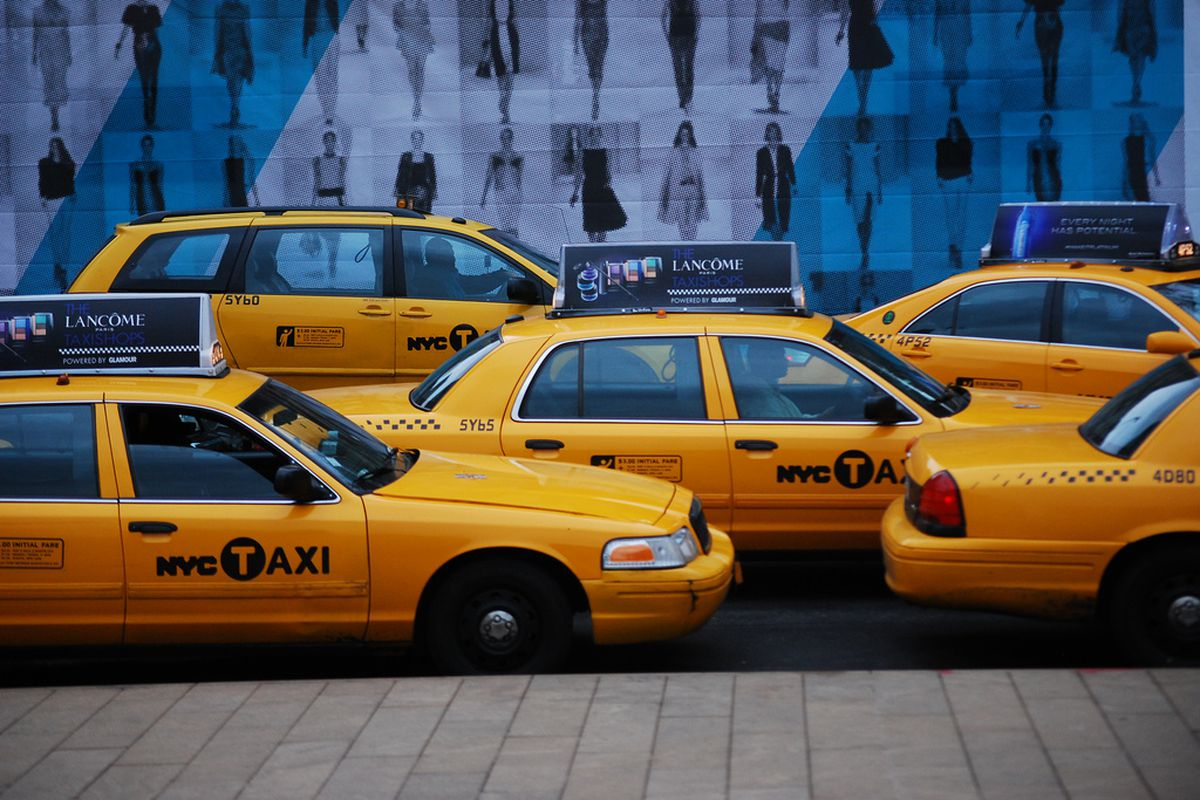

# **How Can Yellow Taxis Survive Uber and Lyft?** An Analysis on NYC TLC Trip Record

---

## I. INTRODUCTION 


### *A. About NYC TLC*

**The New York City Taxi and Limousine Commission**

Created in 1971, NYC TLC is a regulatory agency responsible for overseeing and licensing the New York City's Medallion (Taxi) and for-hire vehicle industries. These are their main business task:

- **Licensing and Regulation**: Issuing licenses to drivers and vehicles, ensuring compliance with safety and operational standards.
- **Fare and Service Standards**: Setting fare structures, service quality guidelines, and operational rules for taxis and for-hire vehicles.
- **Enforcement**: Conducting inspections and enforcement actions to ensure compliance with regulations and improve public safety.
Consumer Protection: Addressing passenger complaints and ensuring fair treatment of customers.
- **Policy Development**: Developing policies to adapt to industry changes, promote sustainability, and address transportation challenges

TLC licenses over 130,000 vehicles in New York City. Each vehicle receives comprehensive safety and emissions inspections by TLC and must be driven by TLC-licensed drivers that have undergone background checks and passed TLC education requirements. These are the types of TLC-licensed vehicles issued:

- **Yellow Taxis**: Also known as taxicabs or medallion taxis. The only vehicle that can perform both street hail and prearranged trips anywhere in the city.    
- **Green Cabs**: Also known as Street Hail Liveries (SHLs) and boro taxis. Provide a mix of prearranged and street hail service everywhere in the city except the airports and Manhattan south of West 110th St. and East 96th St
- **For-Hire Vehicles (FHVs)**: Vehicles that perform trips by prearrangement, not street hails. Includes black cars, livery vehicles, and luxury limousines. Can be dispatched by any for-hire vehicle base, including high-volume for-hire services.​ ‘FHV - Other’ refers to black cars, liveries, and luxury limousines.
- **High-Volume For-Hire Services (FHV - High Volume)**: For-hire vehicle bases that dispatch more than 10,000 trips per day to any type of for-hire vehicle. Lyft and Uber are the two bases currently licensed under this category.​

### *B. Problem Formulation*

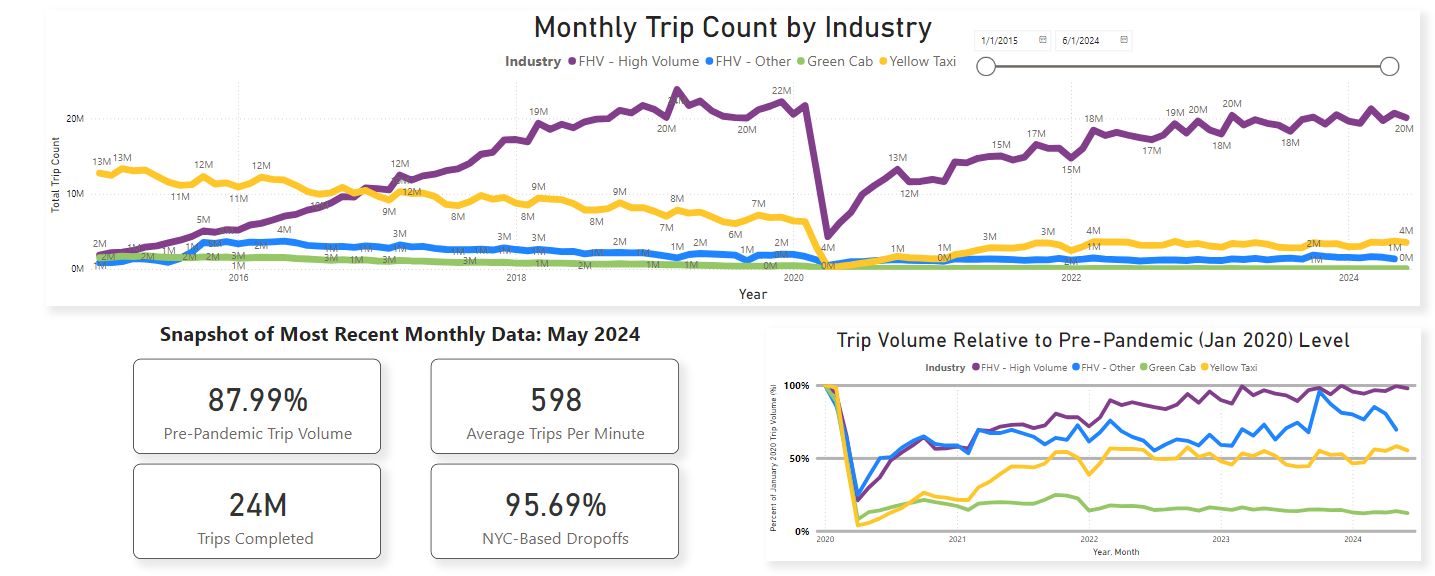

**Problem Statement**

The rise of Uber and Lyft has greatly disrupted the traditional yellow taxi industry in New York City, leading to a decline in ridership and revenue for yellow cabs. This analysis aims to gain a deep **understanding of the yellow taxi industry and identify potential strategies** to improve its performance.

**Research Objective**

1.Ridership Patterns:
- Identify peak hours and days for yellow taxi demand.
- Examine the distribution of trip distances and durations.
- Explore the relationship between passenger count and fare amount.

2.Geographic Analysis:
- Identify high-demand and low-demand zones for yellow taxis.
- Explore the correlation between taxi availability and specific locations (e.g., airports).

3.Financial Performance:
- Analyze the relationship between fare amount, distance, and duration.
- Identify factors influencing tip amounts (e.g., time of day, location, passenger count).

### *C. Data Preparation*

**Acquire the Data**

Obtain the dataset from the NYC Taxi & Limousine Commission (TLC) website or an open data portal like NYC Open Data,  which can be easily accessed [here](https://www.nyc.gov/site/tlc/about/data.page).

In [1]:
# import all libraries needed for the further analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

**Load The Data**

Use Python (with pandas) to load the dataset. Examine the structure of the data, including the number of rows and columns.

In [2]:
# Display data frame we are going to analyse
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0           166           143              1.0           2.58   
1         1.0            24            43              1.0           1.81   
2         1.0           223           179              1.0           0.00   
3         1.0            41           238              1.0           1.30   
4         1.0            41            74              1.0           1.10   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0         14.9    1.0      0.5        4.03           0.0        NaN   
1         10.7    1.0      0.5        2.64           0.0        NaN   
2          7.2    1.0      0.5        1.94           0.0        NaN   
3          6.5    0.5      1.5        1.70           0.0        NaN   
4          6.0    0.5      1.5        0.00           0.0        NaN   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    1.0         24.18           1.0        1.0   
1                    1.0         15.84           1.0        1.0   
2                    1.0         11.64           1.0        1.0   
3                    1.0         10.20           1.0        1.0   
4                    1.0          8.00           1.0        1.0   

   congestion_surcharge  
0                  2.75  
1                  0.00  
2                  0.00  
3                  0.00  
4                  0.00

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
68206         NaN            49            62              NaN        4070.82   
68207         NaN            10           205              NaN           2.14   
68208         NaN            66            37              NaN           3.44   
68209         NaN           225           189              NaN           3.03   
68210         NaN           256           140              NaN           5.82   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
68206        15.70    0.0      0.0        0.00           0.0        NaN   
68207         4.41    0.0      0.0        0.00           0.0        NaN   
68208        16.53    0.0      0.0        3.51           0.0        NaN   
68209        14.98    0.0      0.0        3.20           0.0        NaN   
68210        23.65    0.0      0.0        2.00           0.0        NaN   

       improvement_surcharge  total_amount  payment_type  trip_type  \
68206                    1.0         16.70           NaN        NaN   
68207                    1.0          5.41           NaN        NaN   
68208                    1.0         21.04           NaN        NaN   
68209                    1.0         19.18           NaN        NaN   
68210                    1.0         29.40           NaN        NaN   

       congestion_surcharge  
68206                   NaN  
68207                   NaN  
68208                   NaN  
68209                   NaN  
68210                   NaN

There are  68.211 rows and 20 columns in the dataset, here's the detail information about columns name;

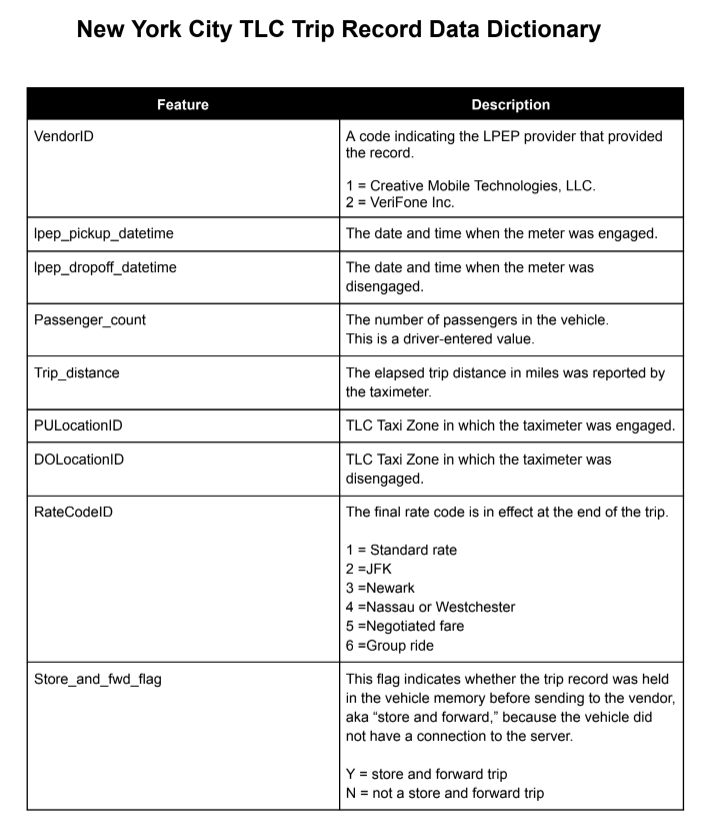
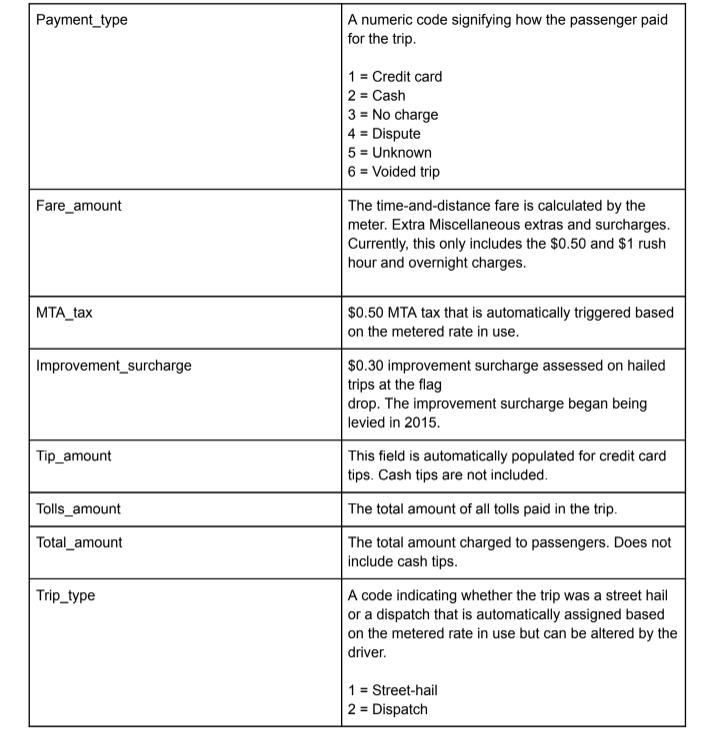


---

## II. DATA CLEANING

### *A. Data Understanding*

Exploring the NYC TLC dataset, examining the structure, types, and contents of the data, identifying key features and patterns, and assessing data quality by checking for missing values, outliers, and inconsistencies. Finding dataset's characteristics and potential issues to inform subsequent data cleaning and analysis steps.

**Explore the Data**

Check the column names and their data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

*Some of the data have null value and does not match the ideal data types, need to cast to the recommended data types. 

In [4]:
df.describe()

VendorID    RatecodeID  PULocationID  DOLocationID  \
count  68211.000000  63887.000000  68211.000000  68211.000000   
mean       1.863028      1.117160     98.549735    138.429901   
std        0.343820      1.372913     61.244314     76.761311   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     74.000000     74.000000   
50%        2.000000      1.000000     75.000000    138.000000   
75%        2.000000      1.000000    129.000000    219.000000   
max        2.000000     99.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount         extra  \
count     63887.000000   68211.000000  68211.000000  68211.000000   
mean          1.315870       8.114852     16.603545      0.825431   
std           0.979054     585.105955     13.470121      1.269904   
min           0.000000       0.000000    -70.000000     -2.500000   
25%           1.000000       1.110000      9.300000      0.000000   
50%           1.000000       1.850000     13.500000      0.000000   
75%           1.000000       3.210000     19.800000      1.000000   
max           9.000000  120098.840000    490.000000     12.500000   

            mta_tax    tip_amount  tolls_amount  ehail_fee  \
count  68211.000000  68211.000000  68211.000000        0.0   
mean       0.588340      2.139012      0.169627        NaN   
std        0.385819      3.052710      1.099789        NaN   
min       -0.500000    -10.500000      0.000000        NaN   
25%        0.500000      0.000000      0.000000        NaN   
50%        0.500000      1.600000      0.000000        NaN   
75%        0.500000      3.330000      0.000000        NaN   
max        2.750000    222.220000     36.050000        NaN   

       improvement_surcharge  total_amount  payment_type     trip_type  \
count           68211.000000  68211.000000  63887.000000  63877.000000   
mean                0.951625     21.789377      1.373613      1.021933   
std                 0.196875     15.457115      0.508039      0.146465   
min                -1.000000    -71.500000      1.000000      1.000000   
25%                 1.000000     12.900000      1.000000      1.000000   
50%                 1.000000     17.900000      1.000000      1.000000   
75%                 1.000000     26.150000      2.000000      1.000000   
max                 1.000000    491.000000      5.000000      2.000000   

       congestion_surcharge  
count          63887.000000  
mean               0.726748  
std                1.212836  
min               -2.750000  
25%                0.000000  
50%                0.000000  
75%                2.750000  
max                2.750000

Some columns have non-normal distributions. It is necessary to detect and either remove or investigate outliers that may skew the analysis. There are also data entries with negative values that might be typographical errors.

In [5]:
listData= []
for col in df.columns:
    listData.append( [col, df[col].nunique(), df[col].unique()])

tableDescription = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listData)
tableDescription


Column Name  Number of Unique  \
0                VendorID                 2   
1    lpep_pickup_datetime             66575   
2   lpep_dropoff_datetime             66519   
3      store_and_fwd_flag                 2   
4              RatecodeID                 6   
5            PULocationID               226   
6            DOLocationID               249   
7         passenger_count                10   
8           trip_distance              1870   
9             fare_amount              2553   
10                  extra                16   
11                mta_tax                 6   
12             tip_amount              1492   
13           tolls_amount                26   
14              ehail_fee                 0   
15  improvement_surcharge                 5   
16           total_amount              4670   
17           payment_type                 5   
18              trip_type                 2   
19   congestion_surcharge                 4   

                                        Unique Sample  
0                                              [2, 1]  
1   [2023-01-01 00:26:10, 2023-01-01 00:51:03, 202...  
2   [2023-01-01 00:37:11, 2023-01-01 00:57:49, 202...  
3                                         [N, Y, nan]  
4                [1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]  
5   [166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ...  
6   [143, 43, 179, 238, 74, 262, 45, 75, 166, 140,...  
7   [1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ...  
8   [2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1...  
9   [14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ...  
10  [1.0, 0.5, 3.75, 0.0, 3.25, 6.0, 5.0, 2.75, 5....  
11                   [0.5, 1.5, 0.0, 1.0, -0.5, 2.75]  
12  [4.03, 2.64, 1.94, 1.7, 0.0, 4.85, 1.0, 3.0, 3...  
13  [0.0, 6.55, 4.0, 13.75, 9.0, 3.0, 11.75, 2.45,...  
14                                              [nan]  
15                        [1.0, 0.0, 0.3, -1.0, -0.3]  
16  [24.18, 15.84, 11.64, 10.2, 8.0, 22.95, 29.2, ...  
17                     [1.0, 2.0, 3.0, 4.0, 5.0, nan]  
18                                    [1.0, 2.0, nan]  
19                       [2.75, 0.0, 2.5, -2.75, nan]

### *B. Remove unecessary information*

**Removed unecessary columns**

Removed columns that are not useful, as they do not contain important information for data analysis. I decided to drop 3 columns as below:
- 'enhail_fee' because this column has 100% missing value.
- 'tolls_amount' since the majority (97.4%) value is zero.
- 'store_and_fwd_flag', highly imbalance (>95%)
- 'improvement_surcharge', 'congestion_surcharge' since there's no possible insight I can get from this columns.

In [6]:
# Dropping Unecessary Column
df.drop(columns=['ehail_fee', 'tolls_amount', 'store_and_fwd_flag' , 'improvement_surcharge', 'congestion_surcharge'], inplace=True)

### *C. Handling Missing Values*

Identify, manage, and impute or remove incomplete data in a dataset.

- **Imputation**, missing values are replaced with estimates derived from the existing data, such as the mean, median, or mode. 
- **Data Removal**, rows or columns with missing values will can be removed if they represent a small portion of the dataset and their omission does not lead to significant information loss.

**Identifying Missing Value**

In [7]:
# Checking the total missing value from each columns
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
total_amount                0
payment_type             4324
trip_type                4334
dtype: int64

In [8]:
# Checking the missing value percentage from each columns
round((df.isnull().sum() / len(df)) * 100, 2)

VendorID                 0.00
lpep_pickup_datetime     0.00
lpep_dropoff_datetime    0.00
RatecodeID               6.34
PULocationID             0.00
DOLocationID             0.00
passenger_count          6.34
trip_distance            0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
total_amount             0.00
payment_type             6.34
trip_type                6.35
dtype: float64

<Axes: >

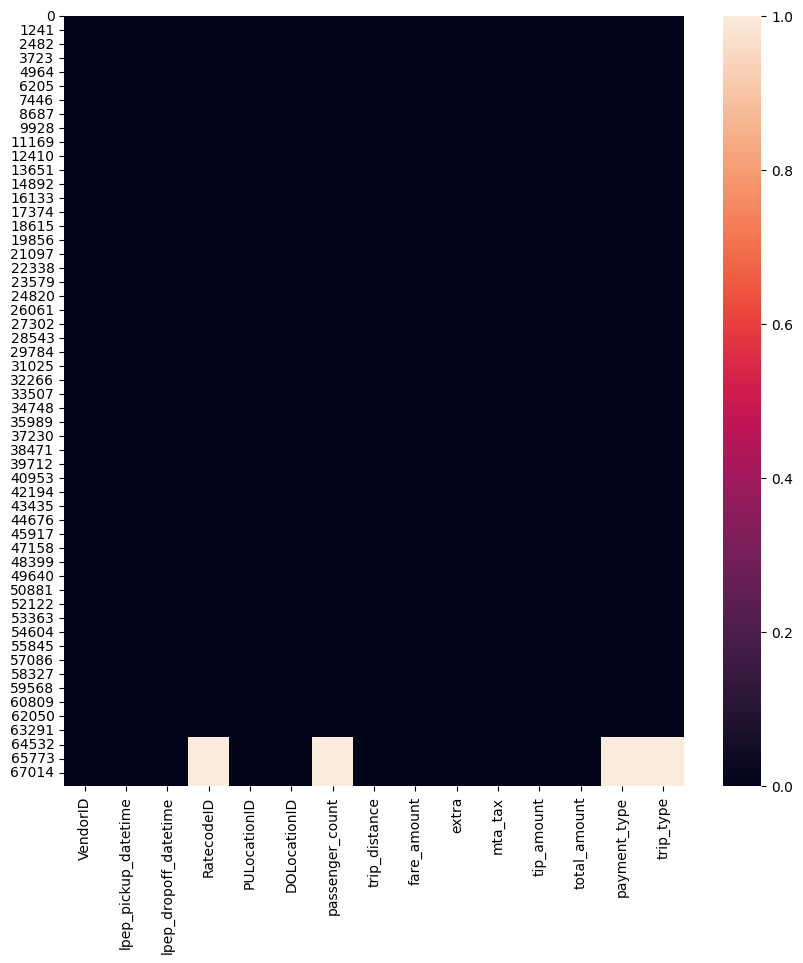

In [9]:
# Visualize the missing value distribution using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

**Handling missing value on column 'passenger_counts'**

To handle missing value in column 'passenger_counts' the missing data can be filled by the median value of passenger count

In [10]:
# fill missing value with median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

**Handling missing value on column 'payment_type'**

Change the missing value to 5, represent the code of payment type is 'unknown'. But, when the payment done using credit card, tips was automatically populated. If there's tips, payment more likely done by credit card.

In [11]:
# make def conditional function to fill payment type based on tip amount.
def fill_payment_type(row):
    if pd.isnull(row['payment_type']):
        if row['tip_amount'] > 0:
            return 1  # 1 is the code for credit card
        else:
            return 5  # Set to 5 for unknown payment type
    else:
        return row['payment_type']

# apply the function
df['payment_type'] = df.apply(fill_payment_type, axis=1)

**Handling missing value on column 'RatecodeID'**

In [12]:
df['RatecodeID'].isna().sum()

4324

RatecodeID :
- Rate #01 – Standard City Rate (within the City limit)
- Rate #02 – JFK Airport (Trips between Manhattan and John F. Kennedy Airport)
- Rate #03 - Newark Airport (EWR)
- Rate #04 – Nassau or Westchester (Out of City Rate)
- Rate #05 – Out of City (Negotiated Flat Rate)


source: https://www.nyc.gov/site/tlc/passengers/taxi-fare.page 

In [13]:
# import taxi zone data to help reading Location ID
df2=pd.read_csv('taxi_zones.csv')

In [14]:
# merge to describe Pick Up location
dfPU = pd.merge(df, df2[['LocationID','zone', 'borough','Shape_Leng','the_geom','Shape_Area']], left_on="PULocationID", right_on="LocationID", how="left")
dfPU.rename(columns={'zone': 'PUZone','borough': 'PUBorough','Shape_Leng':'PUShape_Leng', 'the_geom':'PUthe_geom', 'Shape_Area':'PUShape_Area' }, inplace=True)
dfPU.drop(columns=['LocationID'], inplace=True)

In [15]:
# merge to describe Drop Off location
df= pd.merge(dfPU, df2[['LocationID','zone', 'borough','Shape_Leng','the_geom','Shape_Area']], left_on="DOLocationID", right_on="LocationID", how="left")
df.rename(columns={'zone': 'DOZone','borough': 'DOBorough','Shape_Leng':'DOShape_Leng', 'the_geom':'DOthe_geom', 'Shape_Area':'DOShape_Area' }, inplace=True)
df.drop(columns=['LocationID'], inplace=True)


In [16]:
# checking for Nan Value on merged column
df[['PUZone', 'PUBorough',
       'PUShape_Leng', 'PUthe_geom', 'PUShape_Area', 'DOZone', 'DOBorough',
       'DOShape_Leng', 'DOthe_geom', 'DOShape_Area']].isna().sum()

PUZone          203
PUBorough       203
PUShape_Leng    203
PUthe_geom      203
PUShape_Area    203
DOZone          684
DOBorough       684
DOShape_Leng    684
DOthe_geom      684
DOShape_Area    684
dtype: int64

In [17]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'total_amount', 'payment_type', 'trip_type', 'PUZone', 'PUBorough',
       'PUShape_Leng', 'PUthe_geom', 'PUShape_Area', 'DOZone', 'DOBorough',
       'DOShape_Leng', 'DOthe_geom', 'DOShape_Area'],
      dtype='object')

In [18]:
# change the NaN value on location column to 'Unknown'
df[['PUZone', 'PUBorough',
       'PUShape_Leng', 'PUthe_geom', 'PUShape_Area', 'DOZone', 'DOBorough',
       'DOShape_Leng', 'DOthe_geom', 'DOShape_Area']] = df[['PUZone', 'PUBorough',
       'PUShape_Leng', 'PUthe_geom', 'PUShape_Area', 'DOZone', 'DOBorough',
       'DOShape_Leng', 'DOthe_geom', 'DOShape_Area']].fillna('unknown')

In [19]:
# Check the NaN of RatecodeID
df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0     62518
NaN      4336
5.0      1549
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

In [20]:
# change anomaly value (99) to NaN
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)

In [21]:
# Filter Trips that pick up and drop off still in the same area 
# Impute missing value at RatecodeID as 1 (trip within city)
df.loc[(df['PUBorough']==df['DOBorough']) & (df['RatecodeID'].isna()), 'RatecodeID'] = 1

In [22]:
# Filter Trips between Manhattan and John F. Kennedy Airport, 
# Impute missing value at RatecodeID as 2 (JFK)
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2

In [23]:
# Filter Trips To or from Newark Airport (EWR), 
# Impute missing value at RatecodeID as 3 
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 3
df.loc[(df['PUZone']=='Newark Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 3

In [24]:
# Filter Trips with unknown location (Out of City)
# Impute missing value at RatecodeID as 5 
df.loc[(df['PUBorough']=='unknown') & (df['RatecodeID'].isna()), 'RatecodeID'] = 5
df.loc[(df['DOBorough']=='unknown') & (df['RatecodeID'].isna()), 'RatecodeID'] = 5

In [25]:
# Impute the rest missing value as 4, Nassau or Westchester (Out of City Rate)
df['RatecodeID'].fillna(4, inplace=True)

In [26]:
# Check the NaN of RatecodeID
df['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0    65664
5.0     1570
4.0     1187
2.0      203
3.0       34
Name: count, dtype: int64

**Handling missing value on column 'trip_type'**

It's know that trip_type is code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
- 1 = Street-hail
- 2 = Dispatch

In [27]:
# explore how trip_type 1 distributed
df[(df['trip_type']==1)].value_counts('RatecodeID')

RatecodeID
1.0    62512
2.0      158
5.0      136
4.0       55
3.0       30
Name: count, dtype: int64

In [28]:
df[(df['trip_type']==2)].value_counts('RatecodeID')

RatecodeID
5.0    1413
1.0       6
4.0       2
Name: count, dtype: int64

based on the data above, we can assume that majority trip having RatecodeID 5 are included as Dispatch trip. 

In [29]:
# filter data ratecodeID 5
# impute missing trip_type with 2 (dispatch trip)
df.loc[(df['RatecodeID']==5) & (df['trip_type'].isna()), 'trip_type'] = 2

In [30]:
# impute the rest missing trip_type as 1 (Street-hail)
df['trip_type'].fillna(1, inplace=True)
df['trip_type'].value_counts()

trip_type
1.0    67216
2.0     1442
Name: count, dtype: int64

**Removed unecessary rows**

Based on the missing value percentage, there are columns that have relatively identical result. Let's check the value distribution of each columns.

In [31]:
pd.set_option('display.max_colwidth', 0)

listItem = []
for col in df[['RatecodeID', 'passenger_count', 'payment_type', 'trip_type']]:
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabelDesc

Column Name  Number of Unique  \
0  RatecodeID       5                  
1  passenger_count  10                 
2  payment_type     5                  
3  trip_type        2                  

                                        Unique Sample  
0  [1.0, 5.0, 4.0, 3.0, 2.0]                           
1  [1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, 8.0]  
2  [1.0, 2.0, 3.0, 4.0, 5.0]                           
3  [1.0, 2.0]

<Axes: >

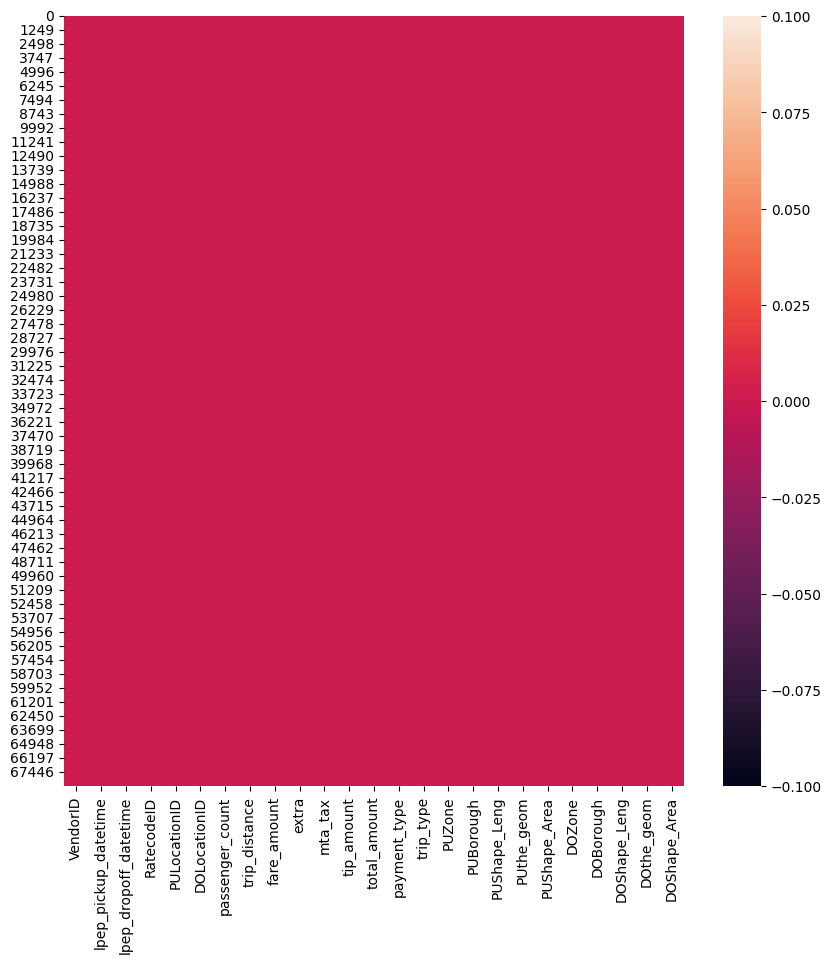

In [32]:
# Recheck & Visualize the missing value distribution using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

Now the dataset already cleaned from missing values

### *C. Handling Inconsistent Value & Spelling Error*
Identifying values that do not conform to expected patterns or standards.

**Adjust data types**

Change the data type of pickup and dropoff date time from 'object' to 'datetime'. The errors='coerce' parameter ensures that any invalid parsing will be set to NaT (Not a Time), which is pandas' equivalent of NaN for datetime data.

In [33]:
# change pick up and drop off time to date time data types
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'], errors='coerce')
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'], errors='coerce')

In [34]:
# make sure the data only show in January 2023
# Decide range time
start_date = '2023-01-01'
end_date = '2023-01-31'

# Filter data based on range time
df = df[(df['lpep_pickup_datetime'] >= start_date) & (df['lpep_dropoff_datetime'] <= end_date)]

Change value and data type of categorical variabel from 'object' or 'float' to 'integer'

In [35]:
# Change columns with categorical data types into int
df[['RatecodeID','passenger_count','payment_type', 'trip_type']] = df[['RatecodeID', 'passenger_count', 'payment_type', 'trip_type']].astype(int)

**Eliminate anomaly**

In [36]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')
num_var.describe()

VendorID    RatecodeID  PULocationID  DOLocationID  \
count  66327.000000  66327.000000  66327.000000  66327.000000   
mean   1.863660      1.147843      98.583669     137.990321     
std    0.343151      0.711795      61.189931     76.797626      
min    1.000000      1.000000      1.000000      1.000000       
25%    2.000000      1.000000      74.000000     74.000000      
50%    2.000000      1.000000      75.000000     138.000000     
75%    2.000000      1.000000      129.000000    218.000000     
max    2.000000      5.000000      265.000000    265.000000     

       passenger_count  trip_distance   fare_amount         extra  \
count  66327.000000     66327.000000   66327.000000  66327.000000   
mean   1.295928         8.160605       16.588927     0.818845       
std    0.949891         593.032681     13.438850     1.264400       
min    0.000000         0.000000      -70.000000    -2.500000       
25%    1.000000         1.120000       9.300000      0.000000       
50%    1.000000         1.850000       13.500000     0.000000       
75%    1.000000         3.210000       19.800000     1.000000       
max    9.000000         120098.840000  490.000000    12.500000      

            mta_tax    tip_amount  total_amount  payment_type     trip_type  
count  66327.000000  66327.000000  66327.000000  66327.000000  66327.000000  
mean   0.587585      2.129607      21.755457     1.381504      1.021002      
std    0.385178      3.060155      15.419523     0.587803      0.143392      
min   -0.500000     -10.500000    -71.500000     1.000000      1.000000      
25%    0.500000      0.000000      12.900000     1.000000      1.000000      
50%    0.500000      1.520000      17.880000     1.000000      1.000000      
75%    0.500000      3.300000      26.150000     2.000000      1.000000      
max    2.750000      222.220000    491.000000    5.000000      2.000000

From the description, we know that there's negative value inside the dataset. In most cases for transformation services, total amount should not be negative. A negative total amount is generally considered as anomaly, could indicate an error, we have to removes it from dataset.

In [37]:
# remove negative value
df= df[(df['total_amount']>=0)]

**Handling zero values**

For 'trip distance' column, value can't be zero. Therefore we remove the zero values with average/calculated mean of trip_distance.

In [38]:
# Calculate the mean of the 'trip_distance' column, excluding zero values
mean_distance = df[df['trip_distance'] != 0]['trip_distance'].mean()

# Replace zero values in 'trip_distance' with the calculated mean
df['trip_distance'] = df['trip_distance'].apply(lambda x: mean_distance if x == 0 else x)

Same goes to 'passeger count' column, value can't be zero. Therefore we remove the zero values with average/calculated mean of passenger_count.

In [39]:
# Calculate the mean of the 'trip_distance' column, excluding zero values
median_passenger = df[df['passenger_count'] != 0]['passenger_count'].median()

# Replace zero values in 'trip_distance' with the mode
df['passenger_count'] = df['passenger_count'].apply(lambda x: median_passenger if x == 0 else x)

**Remove Outliers**

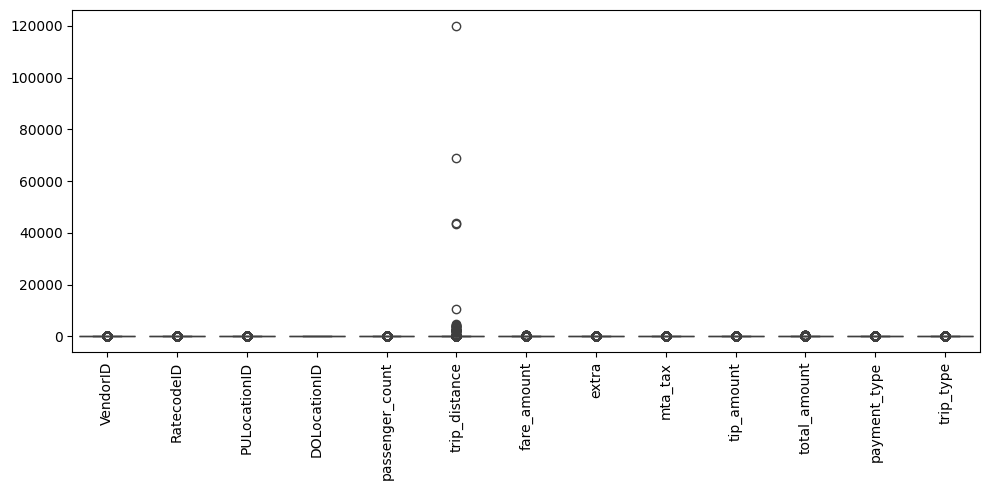

In [40]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# visualize the data distribution to identify outlier using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There's an extreme value on column 'trip_distance'. To ensure only values within a reasonable range are kept, we use IQR method to remove rows with extreme values.

In [41]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) at column 'trip_distance'
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

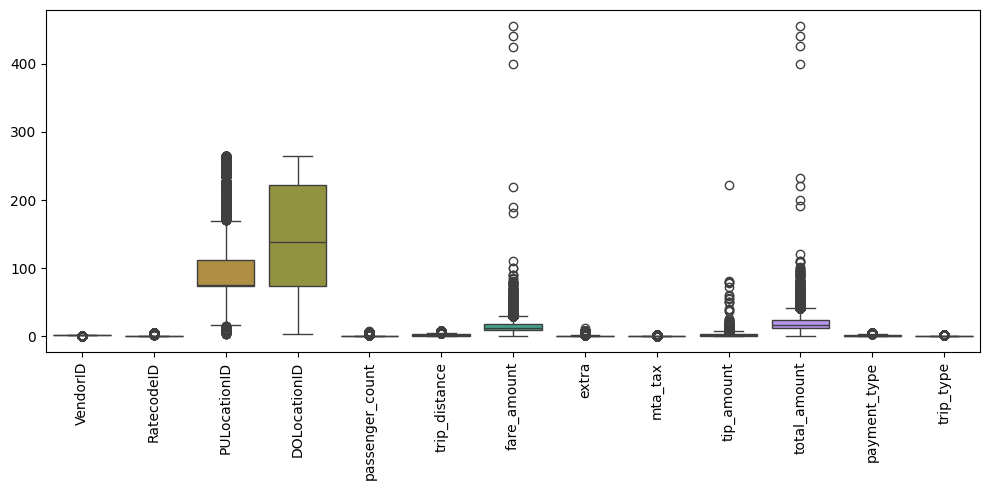

In [42]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# visualize the data distribution to identify outlier using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We could still found extreme value at total amount, actually it's acceptable because fare amount can be negotiate and doesn't have limit value. But for the research sake, we will drop the extreme value if its not significantly affect dataset presentation.

In [43]:
# filter total_amount >$100 based on the figure
len(df[df['total_amount']>100])

15

In [44]:
# since it only 16 rows, we will drop them
df = df[df['total_amount'] <= 100]

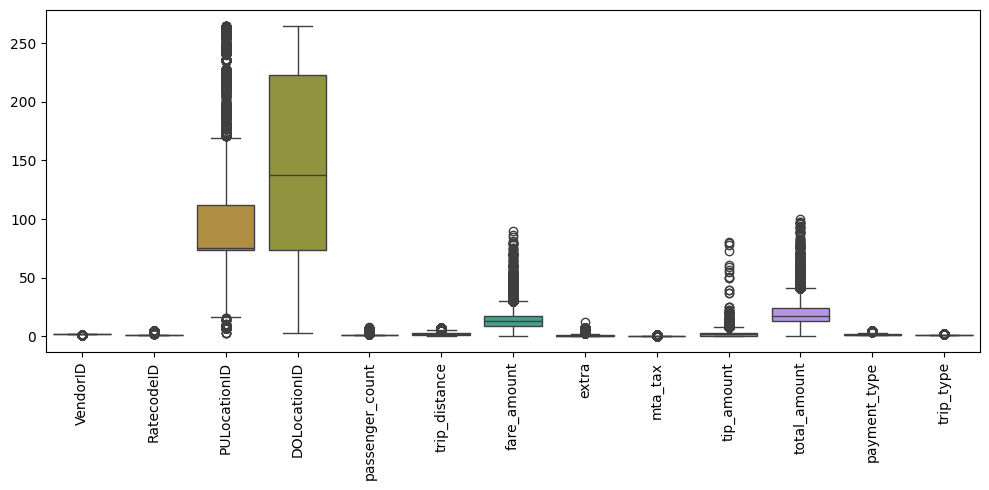

In [45]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# visualize the data distribution to identify outlier using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=num_var)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
df.describe()

VendorID           lpep_pickup_datetime  \
count  59236.000000  59236                           
mean   1.878874      2023-01-16 10:31:04.181426688   
min    1.000000      2023-01-01 00:01:31             
25%    2.000000      2023-01-09 07:57:59.750000128   
50%    2.000000      2023-01-16 16:07:18             
75%    2.000000      2023-01-23 19:28:39.500000      
max    2.000000      2023-01-30 23:51:11             
std    0.326276      NaN                             

               lpep_dropoff_datetime    RatecodeID  PULocationID  \
count  59236                          59236.000000  59236.000000   
mean   2023-01-16 10:47:33.808967424  1.082737      96.206142      
min    2023-01-01 00:13:26            1.000000      3.000000       
25%    2023-01-09 08:15:31.750000128  1.000000      74.000000      
50%    2023-01-16 16:22:41.500000     1.000000      75.000000      
75%    2023-01-23 19:43:19.249999872  1.000000      112.000000     
max    2023-01-31 00:00:00            5.000000      265.000000     
std    NaN                            0.540509      58.717335      

       DOLocationID  passenger_count  trip_distance   fare_amount  \
count  59236.000000  59236.000000     59236.000000   59236.000000   
mean   137.505638    1.308917         2.295760       14.444695      
min    3.000000      1.000000         0.010000       0.000000       
25%    74.000000     1.000000         1.200000       9.300000       
50%    138.000000    1.000000         1.840000       12.800000      
75%    223.000000    1.000000         2.970000       17.700000      
max    265.000000    8.000000         7.440000       90.000000      
std    76.732091     0.960133         1.555831       7.495596       

              extra       mta_tax    tip_amount  total_amount  payment_type  \
count  59236.000000  59236.000000  59236.000000  59236.000000  59236.000000   
mean   0.848445      0.585193      1.974329      19.404823     1.376832       
min    0.000000      0.000000      0.000000      0.000000      1.000000       
25%    0.000000      0.500000      0.000000      12.800000     1.000000       
50%    0.000000      0.500000      1.740000      17.160000     1.000000       
75%    1.000000      0.500000      3.240000      24.100000     2.000000       
max    12.500000     1.500000      80.880000     99.950000     5.000000       
std    1.260528      0.358154      2.372046      9.275165      0.564867       

          trip_type  
count  59236.000000  
mean   1.011463      
min    1.000000      
25%    1.000000      
50%    1.000000      
75%    1.000000      
max    2.000000      
std    0.106449

### *D. Duplicated Data*

Handling duplicated data is an essential to ensure the integrity and accuracy of the dataset. Duplicates can arise due to data entry errors, merging multiple datasets, or other reasons. Use the duplicated() method to check for duplicate rows. By default, this method considers all columns.

In [47]:
# Check duplicates
df.duplicated().sum()

0

In [48]:
df.drop_duplicates(inplace=True)

### *F. Cleaned Data Overview*

After cleaning the data lets take a look into the overview.

In [49]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(59236, 25)


dataFeatures        dataType  null  unique  \
0   VendorID               int64           0     2        
1   lpep_pickup_datetime   datetime64[ns]  0     57741    
2   lpep_dropoff_datetime  datetime64[ns]  0     57710    
3   RatecodeID             int32           0     5        
4   PULocationID           int64           0     192      
5   DOLocationID           int64           0     240      
6   passenger_count        float64         0     8        
7   trip_distance          float64         0     744      
8   fare_amount            float64         0     1734     
9   extra                  float64         0     13       
10  mta_tax                float64         0     4        
11  tip_amount             float64         0     1053     
12  total_amount           float64         0     3278     
13  payment_type           int32           0     5        
14  trip_type              int32           0     2        
15  PUZone                 object          0     190      
16  PUBorough              object          0     6        
17  PUShape_Leng           object          0     191      
18  PUthe_geom             object          0     191      
19  PUShape_Area           object          0     191      
20  DOZone                 object          0     238      
21  DOBorough              object          0     6        
22  DOShape_Leng           object          0     239      
23  DOthe_geom             object          0     239      
24  DOShape_Area           object          0     239      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Before cleaning, we had 68.211 rows of data; now we have 60909 rows. About 8,000 rows of empty data were removed, and the remaining columns adjusted with relevant values.


---

## III. DATA ANALYSIS

### *A. Data Exploration*

**Normal Distribution**

To check data have a normal distribution or not.

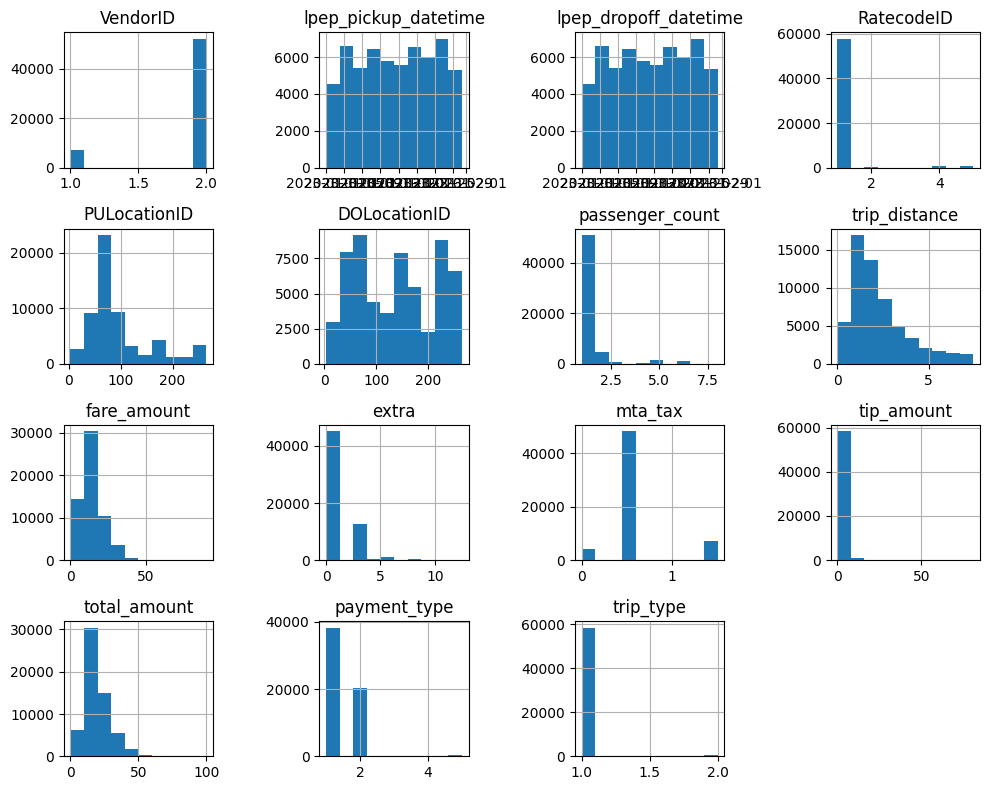

In [50]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Dataset is not normally distributed.

**Correlation**

To understand the data better, make further analysis.

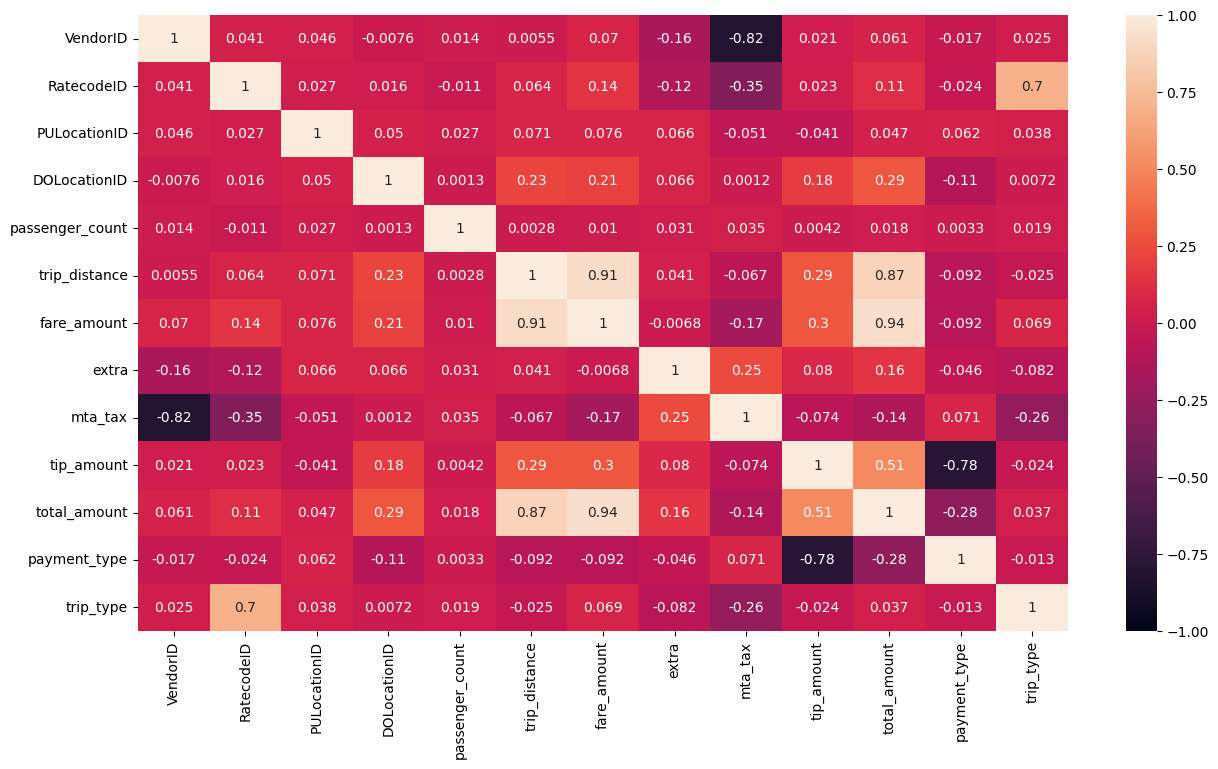

In [51]:
# create data frame that only include numerical value
num_var = df.select_dtypes('number')

# find correlation between column using spearman
plt.figure(figsize=(15,8))
sns.heatmap(num_var.corr('spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

- Total_amount is highly overall correlated with fare_amount (0.94), trip_distance(0.87)
- VendorID is highly overall correlated with mta_tax (-0.82)
- Payment_type is highly overall correlated with tip_amount (-0.78)
- RatecodeID is highly overall correlated with trip_type (0.7)

### *B. Problem Analysis*

**1.Ridership Patterns:**

Enrich data by adding 'trip duration' and time frame column : 'month', 'day' to help calculate trips by time frame.

In [52]:
# Create trip_duration
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 3600.0

# Create columns for month and day of the week
df['month'] = df['lpep_pickup_datetime'].dt.month
df['day_of_week'] = df['lpep_pickup_datetime'].dt.dayofweek

In [53]:
# NB: finding outlier in trip duration (23.98 hours), want to clean the data
len(df[df['trip_duration'] > 2])

212

In [54]:
# since its only 212 data, let's drop the rows
df = df[df['trip_duration'] <= 2]

**- Identify peak hours and days for yellow taxi demand.**

In [55]:
# Extrac lpep_pickup_datetime
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.day_name()

# Calculate total trip per hour in a day
hourly_demand = df['pickup_hour'].value_counts().sort_index().to_frame()
hourly_demand= hourly_demand.reset_index()

# calculate total trip per day in a week
daily_demand = df['pickup_day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).to_frame()
daily_demand = daily_demand.reset_index()

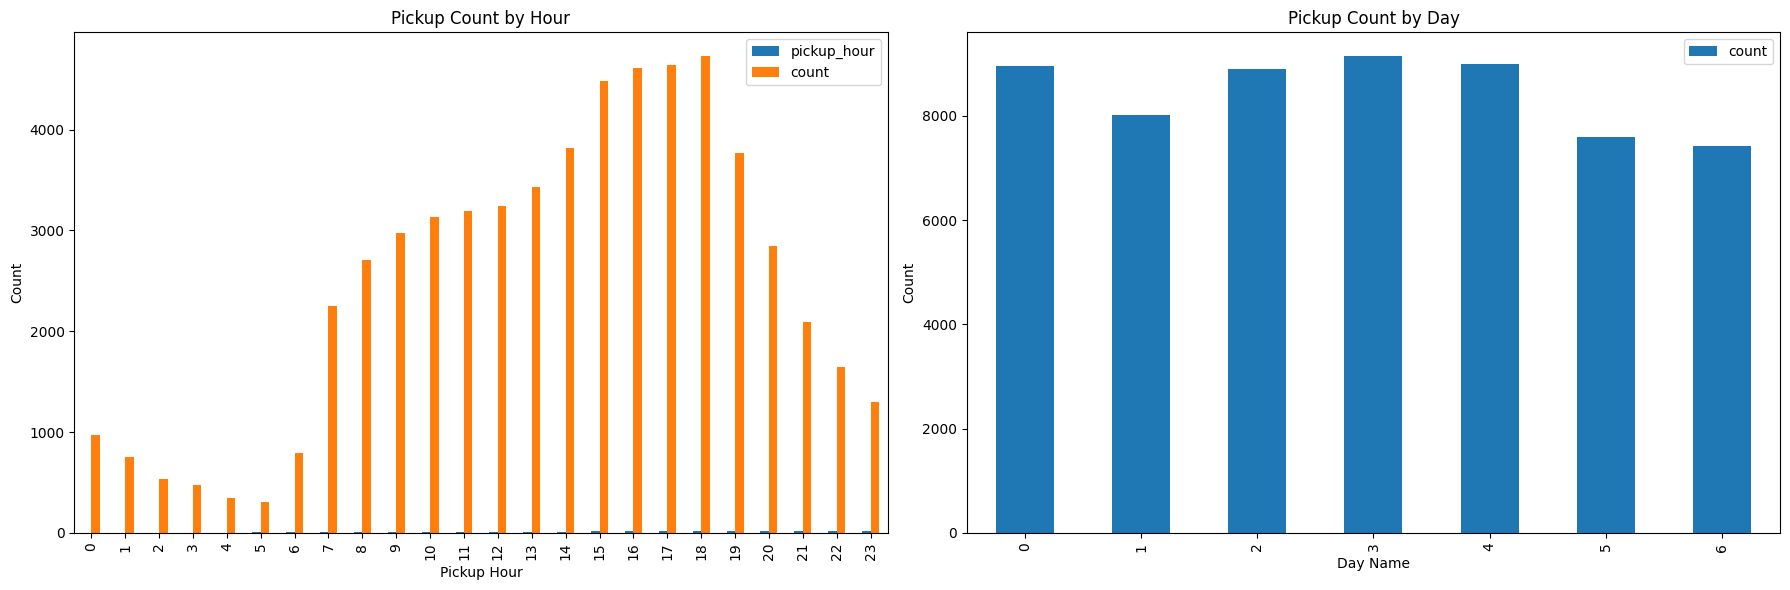

In [56]:
# Create subplot for two bar charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart for pickup count by hour
hourly_demand.plot(kind='bar', ax=axes[0])
axes[0].set_title('Pickup Count by Hour')
axes[0].set_xlabel('Pickup Hour')
axes[0].set_ylabel('Count')

# Bar chart for pickup count by day
daily_demand.plot(kind='bar', ax=axes[1])
axes[1].set_title('Pickup Count by Day')
axes[1].set_xlabel('Day Name')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**- Examine the distribution of trip distances and durations.**

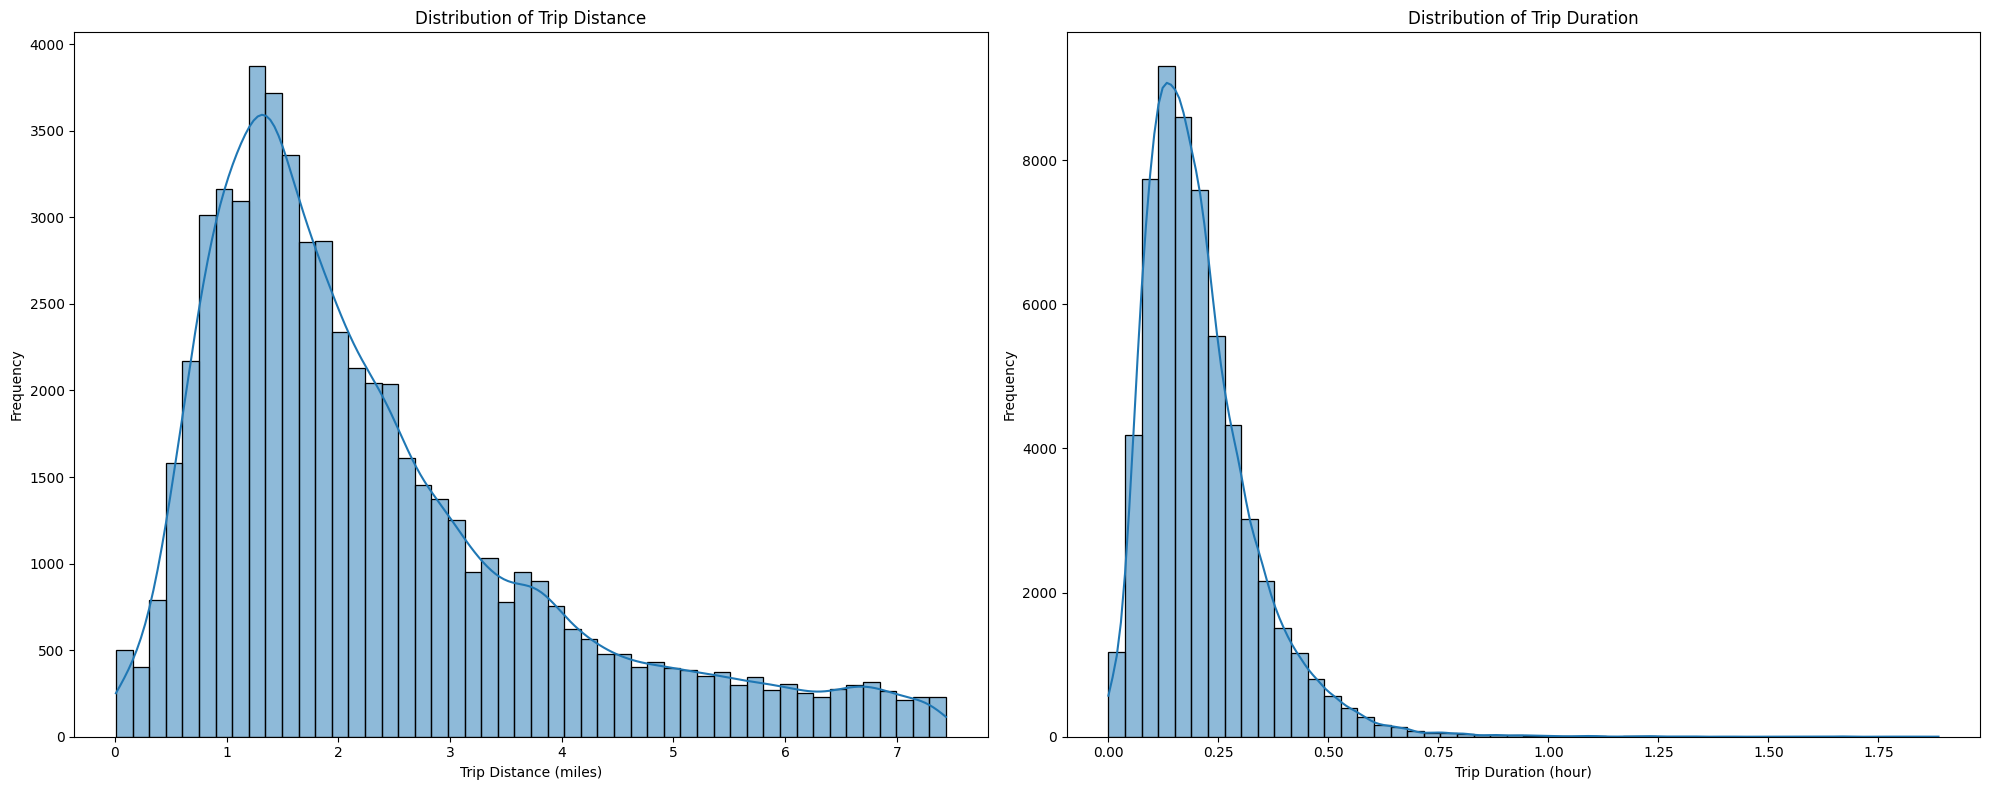

In [57]:
# Create figure and axes for the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Histogram and KDE for trip distance
sns.histplot(df['trip_distance'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Trip Distance')
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Frequency')

# Histogram and KDE for trip duration
sns.histplot(df['trip_duration'], bins=50, kde=True, ax=ax2)
ax2.set_title('Distribution of Trip Duration')
ax2.set_xlabel('Trip Duration (hour)')
ax2.set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

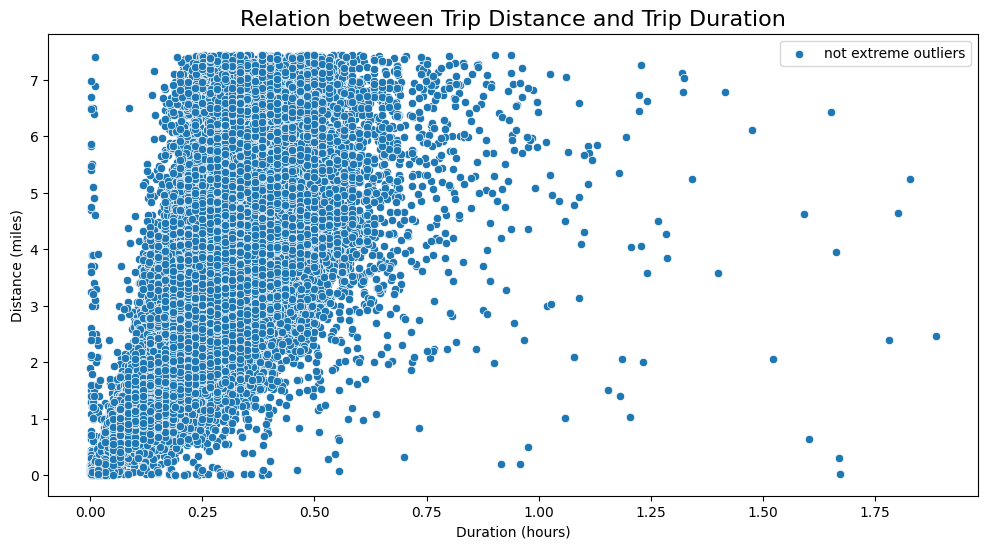

In [58]:
# display the relation between Trip Distance and Trip Duration
plt.figure(figsize=(12,6))

sns.scatterplot(df, x='trip_duration', y='trip_distance', label='not extreme outliers')

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (miles)')
plt.title('Relation between Trip Distance and Trip Duration', fontsize=16)
plt.show()

**- Explore the relationship between passenger count and fare amount.**

In [59]:
# Display descriptive statistics for passenger_count and fare_amount
df[['passenger_count', 'fare_amount']].describe()

passenger_count   fare_amount
count  59024.000000     59024.000000
mean   1.309501         14.439393   
std    0.961027         7.494849    
min    1.000000         0.000000    
25%    1.000000         9.300000    
50%    1.000000         12.800000   
75%    1.000000         17.700000   
max    8.000000         90.000000

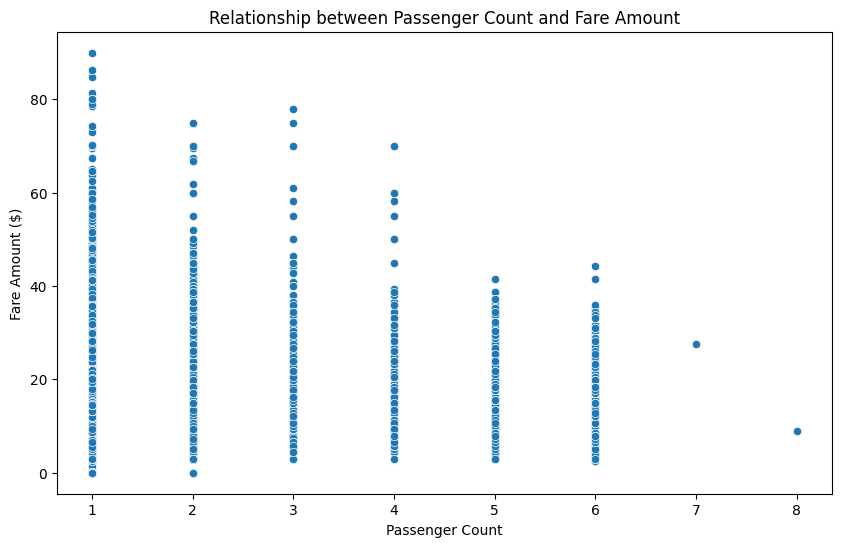

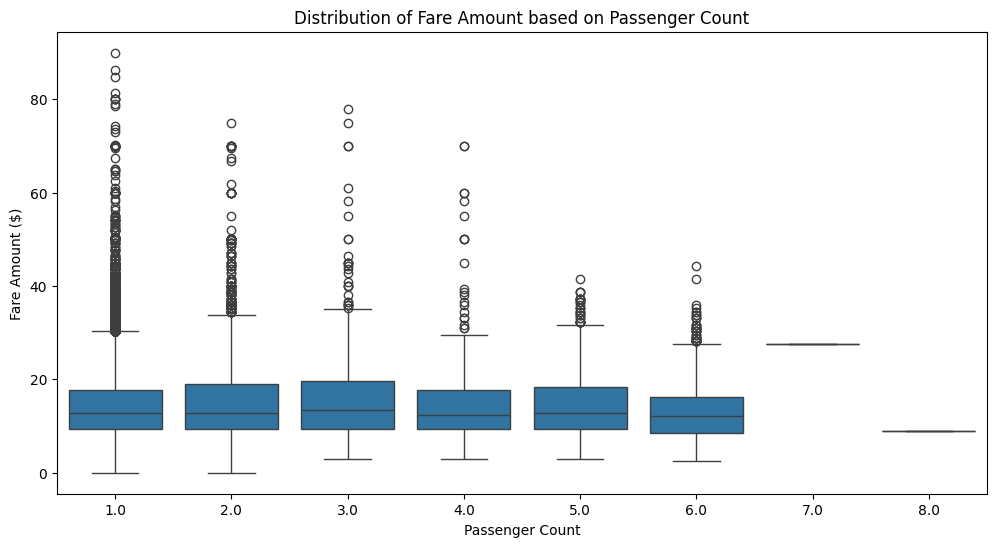

In [60]:
# Create scatter plot to see the relationship between passenger_count and fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Relationship between Passenger Count and Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

# Create box plot to see the distribution of fare_amount based on passenger_count
plt.figure(figsize=(12, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Distribution of Fare Amount based on Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()


**2.Geographic Analysis:**

**- Identify high-demand and low-demand zones for yellow taxis.**

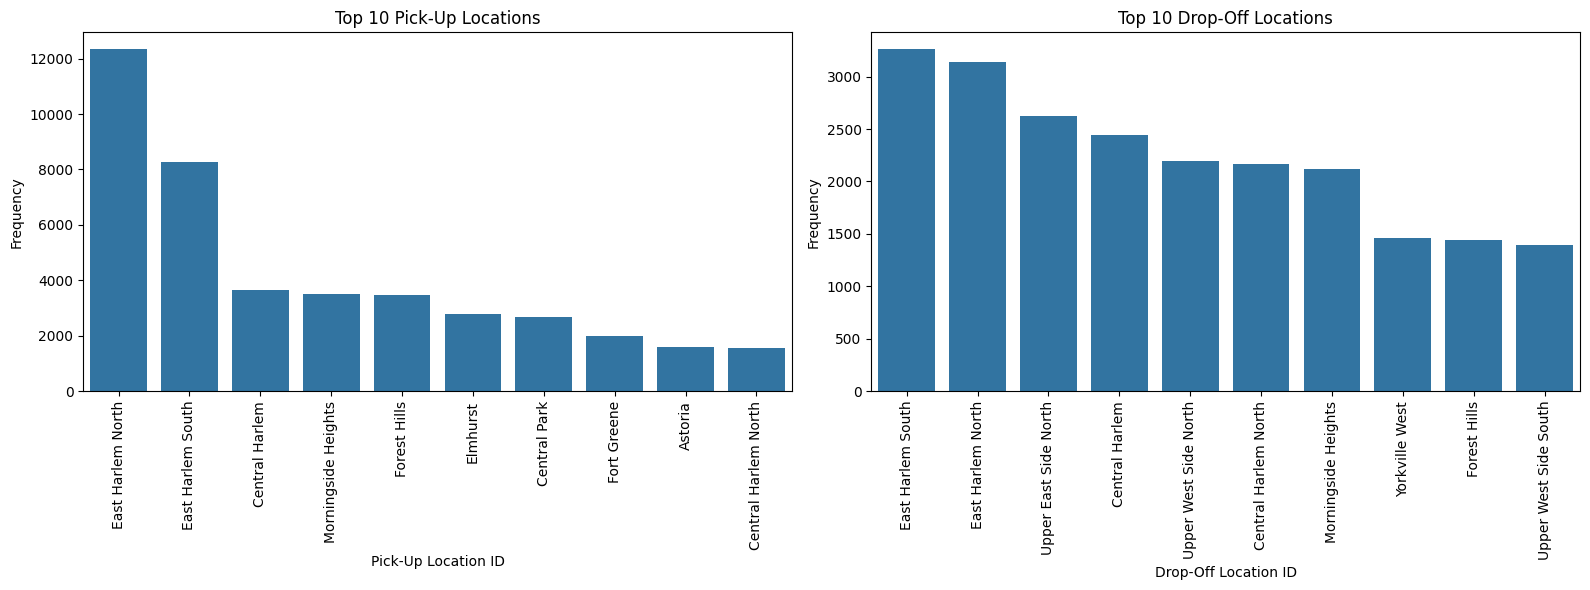

In [61]:
# Calculate the frequency of each pick-up and drop-off location
pickup_freq = df['PUZone'].value_counts().head(10)
dropoff_freq = df['DOZone'].value_counts().head(10)

# Create subplots for bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for pick-up locations
sns.barplot(ax=axes[0], x=pickup_freq.index, y=pickup_freq.values)
axes[0].set_title('Top 10 Pick-Up Locations')
axes[0].set_xlabel('Pick-Up Location ID')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Bar plot for drop-off locations
sns.barplot(ax=axes[1], x=dropoff_freq.index, y=dropoff_freq.values)
axes[1].set_title('Top 10 Drop-Off Locations')
axes[1].set_xlabel('Drop-Off Location ID')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


**3.Financial Performance:**

**- Analyze the relationship between fare amount, distance, and duration.**

In [62]:
# Compute summary statistics
summary_stats = df[['fare_amount', 'trip_distance', 'trip_duration']].describe()
summary_stats

fare_amount  trip_distance  trip_duration
count  59024.000000  59024.000000   59024.000000 
mean   14.439393     2.295107       0.207184     
std    7.494849      1.555207       0.127117     
min    0.000000      0.010000       0.000000     
25%    9.300000      1.200000       0.119444     
50%    12.800000     1.840000       0.182222     
75%    17.700000     2.970000       0.265000     
max    90.000000     7.440000       1.886667

In [63]:
# Compute correlation matrix
correlation_matrix = df[['fare_amount', 'trip_distance', 'trip_duration']].corr()
correlation_matrix

fare_amount  trip_distance  trip_duration
fare_amount    1.000000     0.869508       0.849782     
trip_distance  0.869508     1.000000       0.731353     
trip_duration  0.849782     0.731353       1.000000

The correlation matrix reveals that trip distance is the most influential factor in determining fare amount. While trip duration also has a slight impact, its effect is considerably weaker. This information can be valuable for understanding the pricing structure of taxi rides and for potential predictive modeling.

In [64]:
import statsmodels.api as sm

# Prepare the data for regression
X = df[['trip_distance', 'trip_duration']]
y = df['fare_amount']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print("\nRegression Results:")
print(model.summary())



Regression Results:
                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.731e+05
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:49:46   Log-Likelihood:            -1.4578e+05
No. Observations:               59024   AIC:                         2.916e+05
Df Residuals:                   59021   BIC:                         2.916e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.9248 

Coefficient Interpretation
Intercept (const): The base fare is approximately $4.81.
Trip Distance: For each additional mile traveled, the fare increases by approximately $4.18.
Trip Duration: For each additional hour of travel, the fare increases by approximately $0.17.
Both trip_distance and trip_duration are statistically significant predictors of fare_amount as indicated by their very low p-values (close to 0).

Overall Conclusion
The regression model suggests that both the distance traveled and the duration of the trip significantly influence the fare amount. Distance appears to be the primary factor determining the fare, with duration having a smaller but still significant impact. The model can be used to predict the fare amount for a given trip based on its distance and duration with reasonable accuracy.

In [65]:
df.to_csv(r'NYC TLC Trip Record - Clean.csv', index= False)